In [1]:
# Load modules and data set
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.fruit_label.unique()

array([1, 2, 3, 4], dtype=int64)

In [4]:
fruits.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [5]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [7]:
# Create train test split
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [10]:
# Instanciar o classificador
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [11]:
# Train the classifier
knn.fit(X_train, y_train)

# Agora, o classificador k-NN, que estou usando agora, é um exemplo de uma classe mais geral, chamada
# de Estimador no < scikit-learn>. Então, todos os estimadores possuem o método <fit> que pega os dados 
# de treinamento e modifica os estados dos classificadores, ou objetos do estimador

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
# The metric arg difined how minkowski refers to straight line distance

In [14]:
# Estimate the accuracy of the classifier
knn.score(X_test, y_test)

0.5333333333333333

In [18]:
# Using the KNN
fruit_prediction = knn.predict([[18, 2.3, 3.1]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

([<matplotlib.axis.XTick at 0x1ca35efd898>,
 <a list of 5 Text xticklabel objects>)

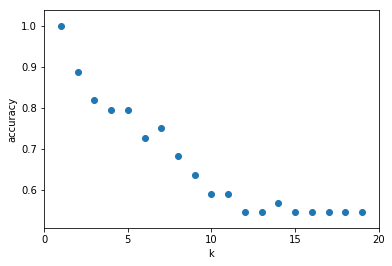

In [20]:
# Accuracy in function of the K parameters
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])